# **Básica Consulta de Dados a partir do R**

## **Instalar e carregar o RSQLite**

In [2]:
install.packages(c('RSQLite'), repos = 'https://cran.rstudio.com', dependecies=TRUE)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘plogr’




In [1]:
library("RSQLite")

## **Criando uma conexão de banco de dados**

In [16]:
conn <- dbConnect(RSQLite::SQLite(), "Querying_DatabaseDB.sqlite")

## **Criando as tabelas BOARD/SCHOOL no banco de dados**



In [3]:
df1 <- dbExecute(conn, "CREATE TABLE BOARD (
  B_ID CHAR(6) NOT NULL,
  B_NAME VARCHAR(75) NOT NULL,
  TYPE VARCHAR(50) NOT NULL,
  LANGUAGE VARCHAR(50),
  PRIMARY KEY (B_ID))",  errors=FALSE)

df2 <- dbExecute(conn, "CREATE TABLE SCHOOL (
  B_ID CHAR(6) NOT NULL,
  S_ID CHAR(6) NOT NULL,
  S_NAME VARCHAR(100),
  LEVEL VARCHAR(70),
  ENROLLMENT INTEGER WITH DEFAULT 10,
  PRIMARY KEY (B_ID, S_ID))", errors=FALSE)

## **Carregando os dados no banco de dados**

In [4]:
boarddf <- read.csv('board.csv')
schooldf <- read.csv('school.csv')

In [5]:
# Visualizando

head(boarddf)
head(schooldf)

,B28010,Algoma.DSB,Public,English
,<chr>,<chr>,<chr>,<chr>
1,B67202,Algonquin and Lakeshore CDSB,Roman Catholic,English
2,B66010,Avon Maitland DSB,Public,English
3,B66001,Bluewater DSB,Public,English
4,B67164,Brant Haldimand Norfolk CDSB,Roman Catholic,English
5,B67008,Bruce-Grey CDSB,Roman Catholic,English
6,B67172,CDSB of Eastern Ontario,Roman Catholic,English


,B28010,X891240,Alexander.Henry.HS,Secondary,X145
,<chr>,<int>,<chr>,<chr>,<int>
1,B28010,902344,Algoma Education Connection SS,Secondary,385
2,B28010,19186,Anna McCrea PS,Elementary,177
3,B28010,67679,Arthur Henderson PS,Elementary,104
4,B28010,28932,Aweres PS,Elementary,95
5,B28010,43362,Ben R McMullin PS,Elementary,241
6,B28010,54542,Blind River PS,Elementary,180


In [15]:
# Renomeando colunas para uma melhor análise
board_cnames <- c("B_ID", "B_NAME", "TYPE", "LANGUAGE")
school_cnames <- c("B_ID", "S_ID", "S_NAME", "LEVEL", "ENROLLMENT")

colnames(boarddf) <- board_cnames
colnames(schooldf) <- school_cnames

# Visualizando novamente
head(boarddf)
head(schooldf)

,B_ID,B_NAME,TYPE,LANGUAGE
,<chr>,<chr>,<chr>,<chr>
1,B67202,Algonquin and Lakeshore CDSB,Roman Catholic,English
2,B66010,Avon Maitland DSB,Public,English
3,B66001,Bluewater DSB,Public,English
4,B67164,Brant Haldimand Norfolk CDSB,Roman Catholic,English
5,B67008,Bruce-Grey CDSB,Roman Catholic,English
6,B67172,CDSB of Eastern Ontario,Roman Catholic,English


,B_ID,S_ID,S_NAME,LEVEL,ENROLLMENT
,<chr>,<int>,<chr>,<chr>,<int>
1,B28010,902344,Algoma Education Connection SS,Secondary,385
2,B28010,19186,Anna McCrea PS,Elementary,177
3,B28010,67679,Arthur Henderson PS,Elementary,104
4,B28010,28932,Aweres PS,Elementary,95
5,B28010,43362,Ben R McMullin PS,Elementary,241
6,B28010,54542,Blind River PS,Elementary,180


In [17]:
# Passando as tabelas para o banco de dados

dbWriteTable(conn, "SCHOOL", schooldf, overWrite=TRUE, header=TRUE)
dbWriteTable(conn, "BOARD", boarddf, overWrite=TRUE, header=TRUE)

# Verificando tabelas

dbListTables(conn)

[1] "BOARD"  "SCHOOL"

## **Imprimindo detalhes para as tabelas BOARD/SCHOOL**

In [18]:
tables <- dbListTables(conn)

for (table in tables){
  cat ("\nInformações da coluna da tabela", table, ":\n")
  col.detail <- dbColumnInfo(dbSendQuery(conn, paste("SELECT * FROM", table)))
  print(col.detail)
}


Informações da coluna da tabela BOARD :
      name      type
1     B_ID character
2   B_NAME character
3     TYPE character
4 LANGUAGE character

Informações da coluna da tabela SCHOOL :


Warning message:
“Closing open result set, pending rows”


        name      type
1       B_ID character
2       S_ID   integer
3     S_NAME character
4      LEVEL character
5 ENROLLMENT   integer


In [19]:
# Exibir dados iniciais dos dataframes BOARD/SCHOOL

dbGetQuery(conn, 'SELECT * FROM BOARD LIMIT 5')
dbGetQuery(conn, 'SELECT * FROM SCHOOL LIMIT 5')

Warning message:
“Closing open result set, pending rows”


B_ID,B_NAME,TYPE,LANGUAGE
<chr>,<chr>,<chr>,<chr>
B67202,Algonquin and Lakeshore CDSB,Roman Catholic,English
B66010,Avon Maitland DSB,Public,English
B66001,Bluewater DSB,Public,English
B67164,Brant Haldimand Norfolk CDSB,Roman Catholic,English
B67008,Bruce-Grey CDSB,Roman Catholic,English


B_ID,S_ID,S_NAME,LEVEL,ENROLLMENT
<chr>,<int>,<chr>,<chr>,<int>
B28010,902344,Algoma Education Connection SS,Secondary,385
B28010,19186,Anna McCrea PS,Elementary,177
B28010,67679,Arthur Henderson PS,Elementary,104
B28010,28932,Aweres PS,Elementary,95
B28010,43362,Ben R McMullin PS,Elementary,241


## **Buscar dados do banco de dados**

In [20]:
# Exibindo algumas linhas do final dos dados
boarddb <- dbGetQuery(conn, 'SELECT * FROM BOARD limit 5')
tail(boarddb)

schooldb <- dbGetQuery(conn, 'SELECT * FROM SCHOOL limit 5')
tail(schooldb)

,B_ID,B_NAME,TYPE,LANGUAGE
,<chr>,<chr>,<chr>,<chr>
1,B67202,Algonquin and Lakeshore CDSB,Roman Catholic,English
2,B66010,Avon Maitland DSB,Public,English
3,B66001,Bluewater DSB,Public,English
4,B67164,Brant Haldimand Norfolk CDSB,Roman Catholic,English
5,B67008,Bruce-Grey CDSB,Roman Catholic,English


,B_ID,S_ID,S_NAME,LEVEL,ENROLLMENT
,<chr>,<int>,<chr>,<chr>,<int>
1,B28010,902344,Algoma Education Connection SS,Secondary,385
2,B28010,19186,Anna McCrea PS,Elementary,177
3,B28010,67679,Arthur Henderson PS,Elementary,104
4,B28010,28932,Aweres PS,Elementary,95
5,B28010,43362,Ben R McMullin PS,Elementary,241


## **Plotando os dados (usando ggplot2)**

In [21]:
library(ggplot2)

In [22]:
# Obtendo os dados do ensino fundamental do banco de dados em ambas as tabelas em sequência decrescente

elequery <- paste("SELECT ENROLLMENT
                  FROM SCHOOL s, BOARD b
                  WHERE b.B_NAME = 'Toronto DSB' AND b.B_ID=s.B_ID
                  AND s.LEVEL = 'Elementary'
                  ORDER BY ENROLLMENT DESC")

# Criando dataframe do ensino fundamental

eledf <- dbGetQuery(conn, elequery)
dim(eledf)

[1] 476   1

Warning message:
“`qplot()` was deprecated in ggplot2 3.4.0.”


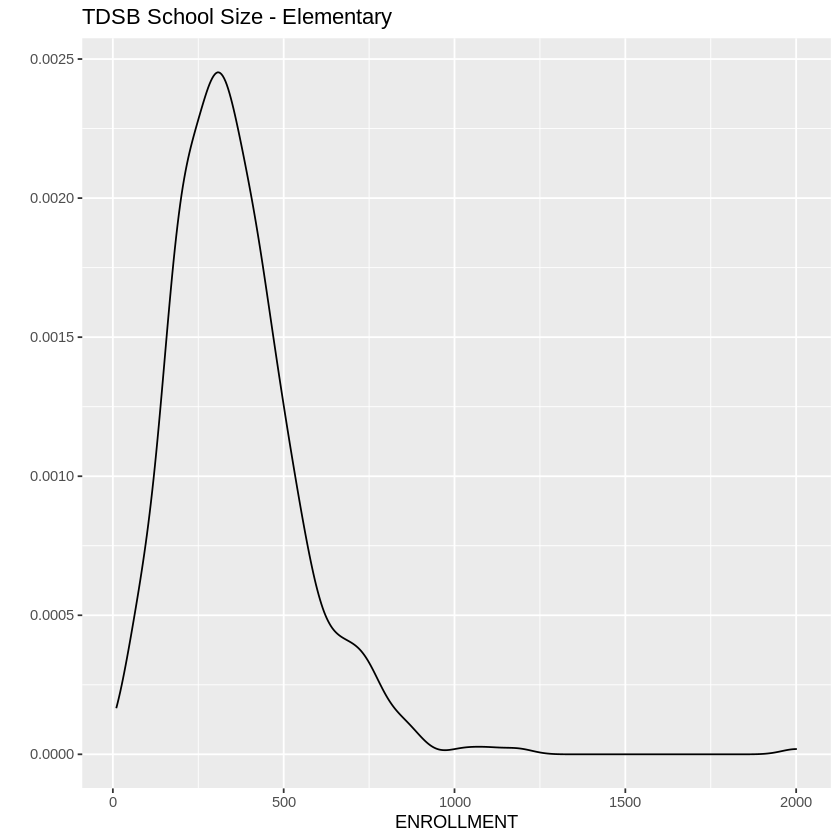

In [23]:
# Criando um gráfico de densidade de matrículas no ensino fundamental

qplot(ENROLLMENT, data=eledf, geom="density",  main="TDSB School Size - Elementary")

In [24]:
# Criando consulta de matrículas do ensino médio em sequência decrescente.

secquency <- paste("SELECT s.ENROLLMENT
                   FROM SCHOOL s, BOARD b
                   WHERE b.B_NAME = 'Toronto DSB' and b.B_ID=s.B_ID and s.LEVEL = 'Secondary'
                   ORDER BY ENROLLMENT DESC")

# Criando um dataframe usando os dados no banco de dados.

secdf <- dbGetQuery(conn, secquency)

Warning message:
“Removed 4 rows containing non-finite values (`stat_density()`).”


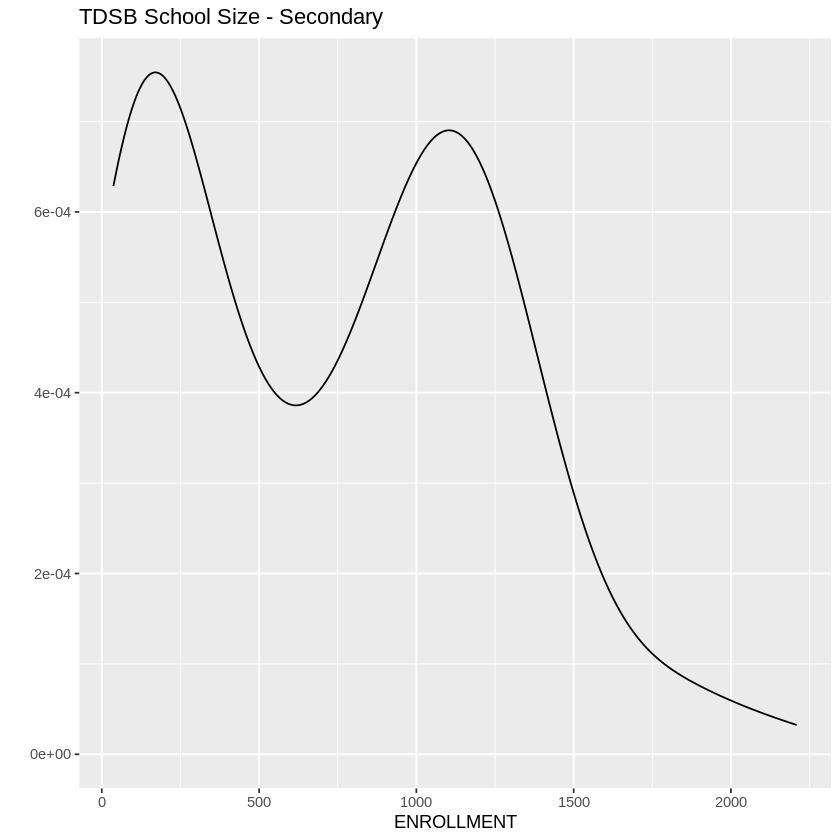

In [25]:
# Criando um gráfico de densidade de matrículas no ensino médio.
qplot(ENROLLMENT, data=secdf, geom="density",  main="TDSB School Size - Secondary")

In [26]:
## Consultando o banco de dados BOARD para inscrições

denquery <- paste("SELECT b.B_NAME, s.S_NAME, LEVEL , ENROLLMENT
                  FROM BOARD b, SCHOOL s
                  WHERE b.B_ID = s.B_ID AND b.B_NAME = 'Toronto DSB'")

## Consultando no banco de dados
dendf <- dbGetQuery(conn, denquery)

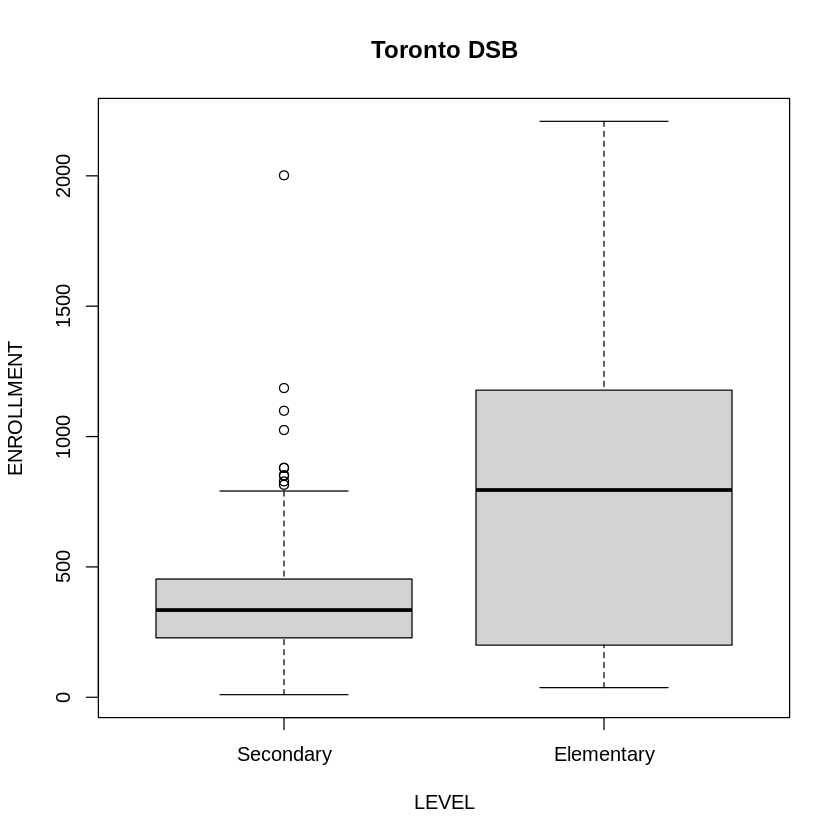

In [28]:
# Criando um box plot de matrículas em escolas primárias e secundárias em Toronto

dendf$LEVEL <- as.factor(dendf$LEVEL)
boxplot(ENROLLMENT ~ LEVEL, dendf, names= c("Secondary","Elementary"), main="Toronto DSB")